<a href="https://colab.research.google.com/github/trorains/Machine_learning-Group_Task-1/blob/master/L2Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
m=0#initial start value of gradient
c=0#initial start value of y-ntercept
L=0.0001#learning rate try playing around with the value to see which ones converge
epoch=100#define whatever number of epochs you want but mind both efficiency and accuracy issues
epoch_error_list=[]
epoch_count_list=[]
list_w=[]#list to input weights
list_w_squared=[]
hyper= 1.5# my choice for hyperparameter to reduce from linear regression function

In [194]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data (3).csv


In [0]:
data=pd.read_csv('data.csv',header=0)

In [0]:
X=data['size_in_sq_ft']
Y=data['price_x1000_sh']
N=float(len(X))

In [0]:
def L2(N,Y,Y_hat,hyper,list_w):#the L2 function for error computation
  for w in list_w:
    w_squared =w**2
    list_w_squared.append(w_squared)
  return (2/N)*sum(Y-Y_hat)**2 -(hyper*(sum(list_w_squared))) #Ridge Regression 
  

In [0]:
def gradient_descent_fit(m,c,N,L):#main function i.e. gradient descent to learn the line of best fit
  epoch_error_list=[]
  epoch_count_list=[]
  for i in range(epoch):#loop as many times as the epochs you want
    Y_hat = m*X+c
    #compute and arrest error for every iteration
    epoch_count_list=epoch_count_list[:]#trick the list to get its instace
    epoch_count_list.append(i)
    epoch_error=L2(N,Y,Y_hat,hyper,list_w)
    epoch_error_list=epoch_error_list[:]
    epoch_error_list.append(epoch_error)
    #minimize the error function by computing partial derivatives
    D_m=(-4/N)*sum(X*(Y-Y_hat))-(2*sum(list_w)) #derived partial gradeint for m
    D_c=(-4/N)*sum(Y-Y_hat)-(2*1)#derived partial gradient for c
    #Apply gradient descent formular to update both m and c into new values
    m=m-(L * D_m)
    list_w.append(m)
    c=c-(L * D_c)
  #you can print the final m and c after all iterations are done
  print("final m is: ",m," and final c is: ",c)
  #return final predicted value of Y-dependent variable
  return Y_hat,epoch_count_list,epoch_error_list


# Kindly press link(ctrl+ click) To see image of our workings for loss function and its derivative.
[](https://drive.google.com/file/d/1A91tKbLsS12R4IspLTb03ZIcTxxVKZXf/view?usp=sharing)
[link text](https://drive.google.com/file/d/1A91tKbLsS12R4IspLTb03ZIcTxxVKZXf/view?usp=sharing)

final m is:  1.5402493403264421  and final c is:  -0.025935156367215613


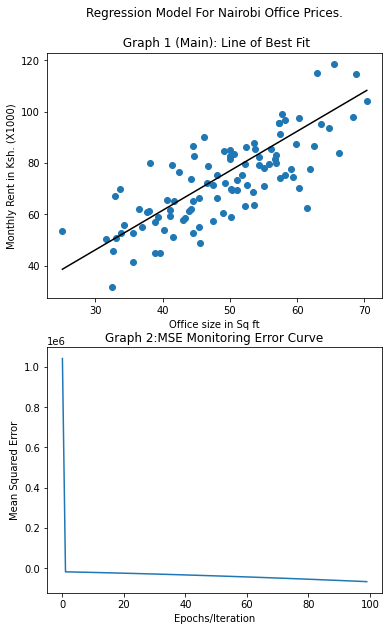

In [200]:
#call gradient descent fit function
returned_params=gradient_descent_fit(m,c,N,L)
y_predicted=returned_params[0]
total_epochs=returned_params[1]
all_epoch_errors=returned_params[2]

#create plot for both line of best fit and error reduction graphs
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw={'top':2})
ax1.set(xlabel="Office size in Sq ft")
ax1.set(ylabel="Monthly Rent in Ksh. (X1000)")
ax1.set_title("Regression Model For Nairobi Office Prices.\n\n Graph 1 (Main): Line of Best Fit")
ax1.scatter(X,Y)

ax1.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='black')
ax2.set_title("Graph 2:MSE Monitoring Error Curve")
ax2.set(xlabel="Epochs/Iteration")
ax2.set(ylabel="Mean Squared Error")
ax2.plot(total_epochs,all_epoch_errors)

#Destroy the used lists to prevent recarpetting on append
epoch_count_list.clear()
epoch_error_list.clear()